In [2]:
import numpy as np
import pandas as pd
import csv
import statistics
import matplotlib.pyplot as plt

**READ IN CSVs PRODUCED BY two_photon & edgescore scripts**

In [3]:
# root = '../data/exp_627823571_VISp/'
max_dff_ordered=pd.read_csv('max_dff_subset_ordered.csv') # natural
mean_dff_ordered=pd.read_csv('mean_dff_subset_ordered.csv') # natural 
ns_stim_exp=pd.read_csv('ns_stim_frame_presentation.csv') # natural 
pref_ori_ordered=pd.read_csv('pref_ori_ordered_subset.csv') # static 
# list_of_osi_cells = pd.read_csv('cell_specimen_id_filtered.csv') # static 
edge_scores=pd.read_csv('edge_scores_normalized_by_sum.csv')
two_linear_ori=pd.read_csv('two_std_linear.csv')
one_linear_ori=pd.read_csv('one_std_linear.csv')

**FIND AVERAGE DFF FOR EACH IMAGE FOR EACH CELL (AVERAGING ACROSS THE 50 REPLICATES OF EACH STIM PRESENTATION)**

In [4]:
# adjust frame numbers by making every instance of 1 -> 117 
list_ns_stim_exp=list(ns_stim_exp.frame)
list_ns_stim_exp_adjusted = [117.0 if value == -1 else value for value in list_ns_stim_exp]


In [5]:
# transpose dff dataframes to prepare to associate with each natural scene frame
max_dff_ordered_t=max_dff_ordered.T
mean_dff_ordered_t=mean_dff_ordered.T

In [6]:
print(max_dff_ordered['cell_specimen_id'])

0      662199605
1      662199626
2      662199683
3      662199697
4      662199710
         ...    
117    662203014
118    662203030
119    662203048
120    662203077
121    662203089
Name: cell_specimen_id, Length: 122, dtype: int64


In [10]:
# list_of_osi_cells=two_linear_ori

In [7]:
pref_ori_ordered

,cell_specimen_id,pref_ori
0,662199605,90
1,662199626,90
2,662199683,120
3,662199697,0
4,662199710,0
...,...,...
117,662203014,90
118,662203030,60
119,662203048,60
120,662203077,90


In [8]:
pref_ori_lists = {90: [], 120: [], 0: [], 30: [], 60: [], 150: []}
df_pref_ori_ordered = pd.DataFrame(pref_ori_ordered)


for index, row in df_pref_ori_ordered.iterrows():
    cell_specimen_id = row['cell_specimen_id']
    pref_ori = row['pref_ori']
    pref_ori_lists[pref_ori].append(cell_specimen_id)

print(pref_ori_lists)


{90: [662199605, 662199626, 662199727, 662199848, 662199907, 662200053, 662200071, 662200097, 662200146, 662200241, 662200268, 662200347, 662200392, 662200494, 662200841, 662201033, 662201114, 662201262, 662201359, 662201468, 662201555, 662201643, 662201690, 662202375, 662202564, 662202597, 662202673, 662202690, 662202948, 662203014, 662203077], 120: [662199683, 662199835, 662200445, 662200486, 662200560, 662200636, 662200729, 662201175, 662201674, 662201773, 662201791, 662201965, 662201975, 662202121, 662202542, 662203089], 0: [662199697, 662199710, 662200128, 662200162, 662200527, 662200746, 662200759, 662201098, 662201246, 662201299, 662201459, 662201492, 662201594, 662201744, 662201807, 662201917, 662202157, 662202510, 662202612, 662202627, 662202641, 662202654, 662202747, 662202935], 30: [662200029, 662200180, 662200220, 662200515, 662200969, 662201050, 662201087, 662201126, 662201233, 662201254, 662201325, 662201381, 662201406, 662201516, 662201874, 662202175, 662202199, 66220222

In [24]:
def filter(stdev, dff):
    dff_filtered=dff[dff['cell_specimen_id'].isin(stdev['cell_specimen_id'])]
    return dff_filtered

mean_dff_filtered_one=filter(one_linear_ori, mean_dff_ordered)
max_dff_filtered_one=filter(one_linear_ori, max_dff_ordered)

mean_dff_filtered_two=filter(two_linear_ori, mean_dff_ordered)
max_dff_filtered_two=filter(two_linear_ori, max_dff_ordered)

In [30]:
# replace numbers 0-5949 in ns_stim_frame_presentation with ns_stim_list 
list_ns_stim_exp_adjusted_id = ['cell_specimen_id'] + list_ns_stim_exp_adjusted


mean_dff_filtered_one.columns=list_ns_stim_exp_adjusted_id
max_dff_filtered_one.columns=list_ns_stim_exp_adjusted_id

mean_dff_filtered_two.columns=list_ns_stim_exp_adjusted_id
max_dff_filtered_two.columns=list_ns_stim_exp_adjusted_id

In [44]:
# creating a dictionary that separates mean_dff_ordered_filtered and max_dff_ordered_filtered by preferred orientation

def merge(filtered):
    filtered_pref_ori=pd.merge(filtered, pref_ori_ordered, on='cell_specimen_id')
    return filtered_pref_ori

mean_dff_filtered_one_pref_ori=merge(mean_dff_filtered_one)
max_dff_filtered_one_pref_ori=merge(max_dff_filtered_one)
mean_dff_filtered_two_pref_ori=merge(mean_dff_filtered_two)
max_dff_filtered_two_pref_ori=merge(max_dff_filtered_two)

mean_df_dict_one = {}
max_df_dict_one = {}

mean_df_dict_two = {}
max_df_dict_two = {}

def ori_dict(df_dict, filtered_pref_ori):
    for pref_ori_value in [0, 30, 60, 90, 120, 150]:
        df_dict[pref_ori_value] = filtered_pref_ori[filtered_pref_ori['pref_ori'] == pref_ori_value].drop(columns=['pref_ori'])

ori_dict(mean_df_dict_one, mean_dff_filtered_one_pref_ori)
ori_dict(max_df_dict_one, max_dff_filtered_one_pref_ori)

ori_dict(mean_df_dict_two, mean_dff_filtered_two_pref_ori)
ori_dict(max_df_dict_two, max_dff_filtered_two_pref_ori)

# for pref_ori_value in [0, 30, 60, 90, 120, 150]:
#     mean_df_dict[pref_ori_value] = mean_dff_ordered_filtered_with_pref_ori[mean_dff_ordered_filtered_with_pref_ori['pref_ori'] == pref_ori_value].drop(columns=['pref_ori'])
#     max_df_dict[pref_ori_value] = max_dff_ordered_filtered_with_pref_ori[max_dff_ordered_filtered_with_pref_ori['pref_ori'] == pref_ori_value].drop(columns=['pref_ori'])

In [45]:
# Since each image is repeated 50 times, for each cell I will average the 50 repetitions of each image. 
# This should reduce the number of columns from 5951 image repetitions to 118 images

def avg_replicate(df_dict):
    for pref_ori_value in [0, 30, 60, 90, 120, 150]:
        df_dict[pref_ori_value] = df_dict[pref_ori_value].groupby(axis=1, level=0).mean()

avg_replicate(mean_df_dict_one)
avg_replicate(max_df_dict_one)

avg_replicate(mean_df_dict_two)
avg_replicate(max_df_dict_two)


# for pref_ori_value in [0, 30, 60, 90, 120, 150]:
#     mean_df_dict[pref_ori_value] = mean_df_dict[pref_ori_value].groupby(axis=1, level=0).mean()
#     max_df_dict[pref_ori_value] = max_df_dict[pref_ori_value].groupby(axis=1, level=0).mean()

In [85]:
# sanity check to check the size 
mean_df_dict_one[30]

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,cell_specimen_id
9,0.003813,-0.001686,0.013384,0.007643,-0.000403,-0.002244,0.011796,0.001159,0.007824,0.029165,...,0.020556,-0.000868,0.022392,0.003462,0.005928,0.007965,0.015741,0.035766,0.004723,662202175.0
10,0.024130,0.136915,0.053745,0.025220,0.054887,0.129784,0.051042,0.020851,0.078970,0.050079,...,0.018509,0.036885,0.063080,0.038895,0.047959,0.040945,0.011236,0.012851,0.016488,662202199.0


In [48]:
# print out format of edge scores
edge_scores

,Unnamed: 0,0,30,60,90,120,150
0,0,0.140268,0.113346,0.117948,0.158095,0.234487,0.235856
1,1,0.111325,0.153892,0.183915,0.229867,0.176943,0.144058
2,2,0.178618,0.139028,0.134122,0.158725,0.197833,0.191674
3,3,0.114039,0.130004,0.161034,0.209393,0.203055,0.182475
4,4,0.099571,0.169813,0.222011,0.233712,0.134635,0.140258
...,...,...,...,...,...,...,...
113,113,0.613158,0.158085,0.066591,0.025282,0.046567,0.090316
114,114,0.025913,0.051173,0.124503,0.603462,0.126572,0.068376
115,115,0.179647,0.207055,0.145380,0.094193,0.165506,0.208220
116,116,0.154026,0.155797,0.151183,0.143921,0.195839,0.199233


In [133]:
def transpose(dict):
    transposed={0: [], 30: [], 60: [], 90: [], 120: [], 150: []}
    for degree in [0, 30, 60, 90, 120, 150]:
        transposed[degree]=dict[degree].T
    return transposed

mean_df_dict_one_T=transpose(mean_df_dict_one)
max_df_dict_one_T=transpose(max_df_dict_one)

mean_df_dict_two_T=transpose(mean_df_dict_two)
max_df_dict_two_T=transpose(max_df_dict_two)

In [185]:
from scipy.stats import pearsonr

degrees=['0', '30', '60', '90', '120', '150']
degrees_num=[0, 30, 60, 90, 120, 150]

In [184]:
# fig, axs=plt.subplots(len(mean_df_dict_one_T), figsize=(5, 30))

# for i in range(len(mean_df_dict_one_T)):
#     corr_coeff_all=[]
#     for column in mean_df_dict_one_T[degrees_num[i]].columns:
#         axs[i].scatter(edge_scores[degrees[i]], mean_df_dict_one_T[degrees_num[i]][column][:-1], alpha=0.4, s=10)
#         axs[i].set_title(f'{30*i}°')
#         axs[i].set(xlabel = f'{30*i}° edge enrichment', ylabel= f'mean dff of {30*i}° selective cells')

#         correlation_coefficient, _ = pearsonr(edge_scores[degrees[i]], mean_df_dict_one_T[degrees_num[i]][column][:-1])
#         corr_coeff_all.append(round(correlation_coefficient, 5))
        
#         axs[i].legend(corr_coeff_all, loc="upper right")

In [188]:
def generate_fig(dict):
    fig, axs=plt.subplots(1, len(dict), figsize=(30, 5))
    
    for i in range(len(dict)):
        corr_coeff_all=[]
        for column in dict[degrees_num[i]].columns:
            axs[i].scatter(edge_scores[degrees[i]], dict[degrees_num[i]][column][:-1], alpha=0.4, s=10)
            axs[i].set_title(f'{30*i}°')
            axs[i].set(xlabel = f'{30*i}° edge enrichment', ylabel= f'mean dff of {30*i}° selective cells')
    
            correlation_coefficient, _ = pearsonr(edge_scores[degrees[i]], dict[degrees_num[i]][column][:-1])
            corr_coeff_all.append(round(correlation_coefficient, 5))
            
            axs[i].legend(corr_coeff_all, loc="upper right")

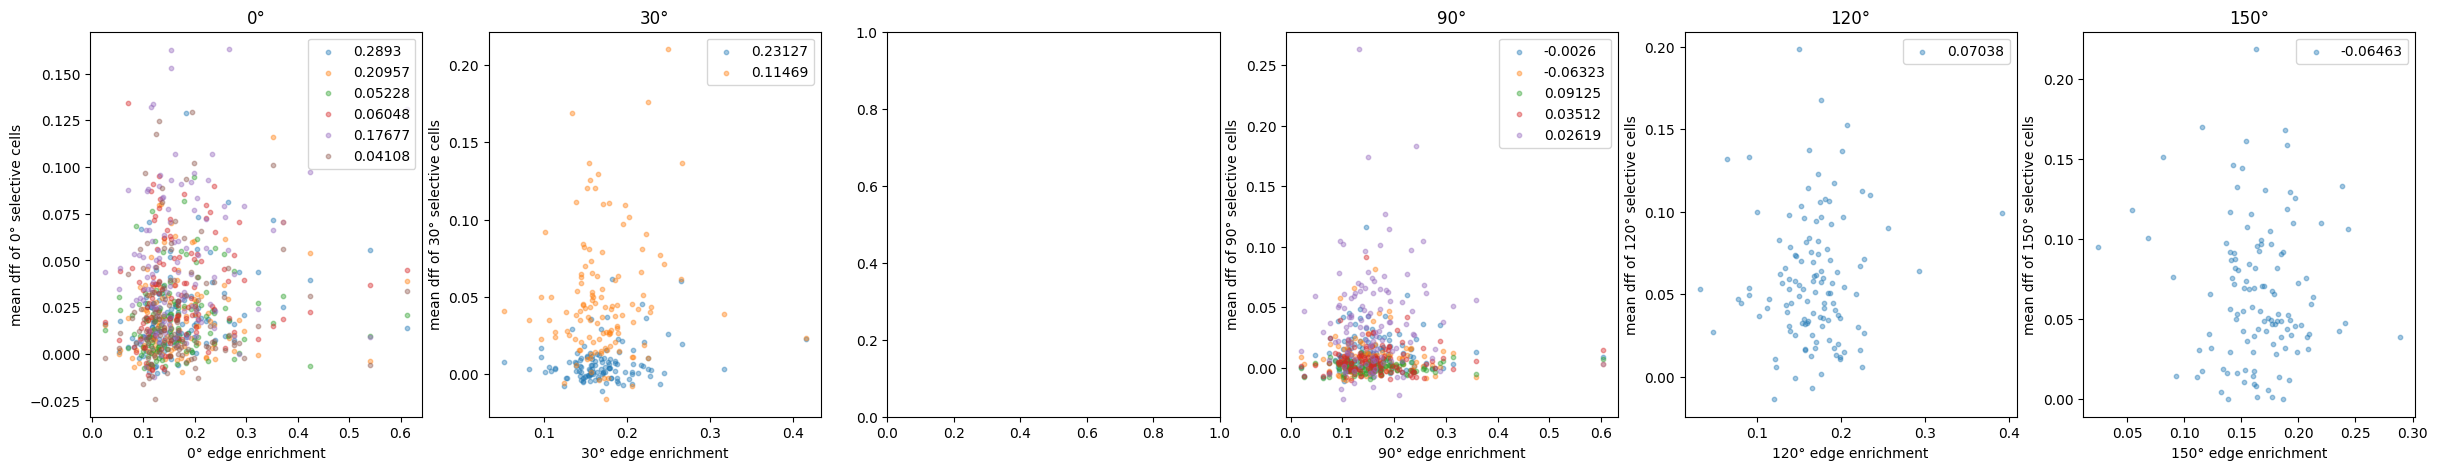

In [189]:
generate_fig(mean_df_dict_one_T)

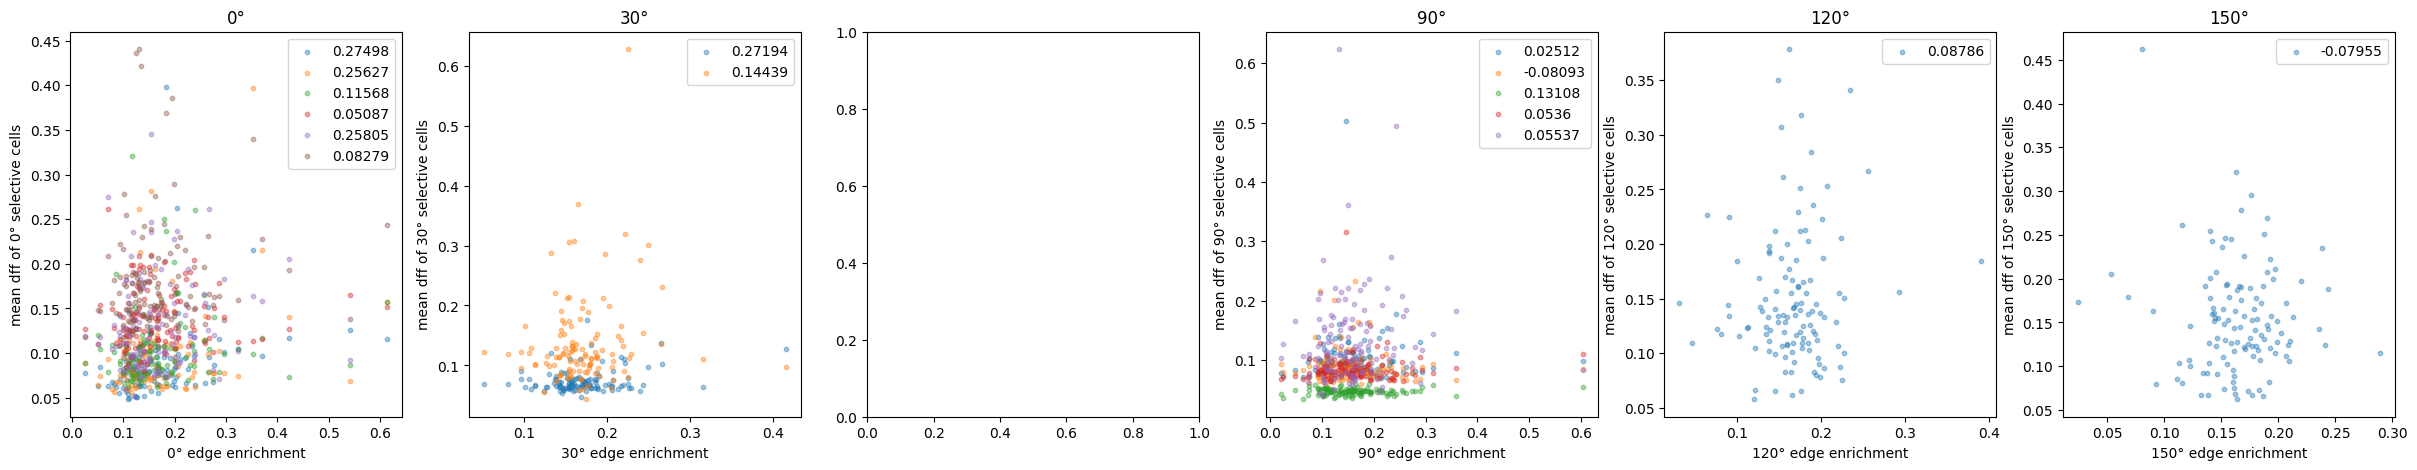

In [190]:
generate_fig(max_df_dict_one_T)

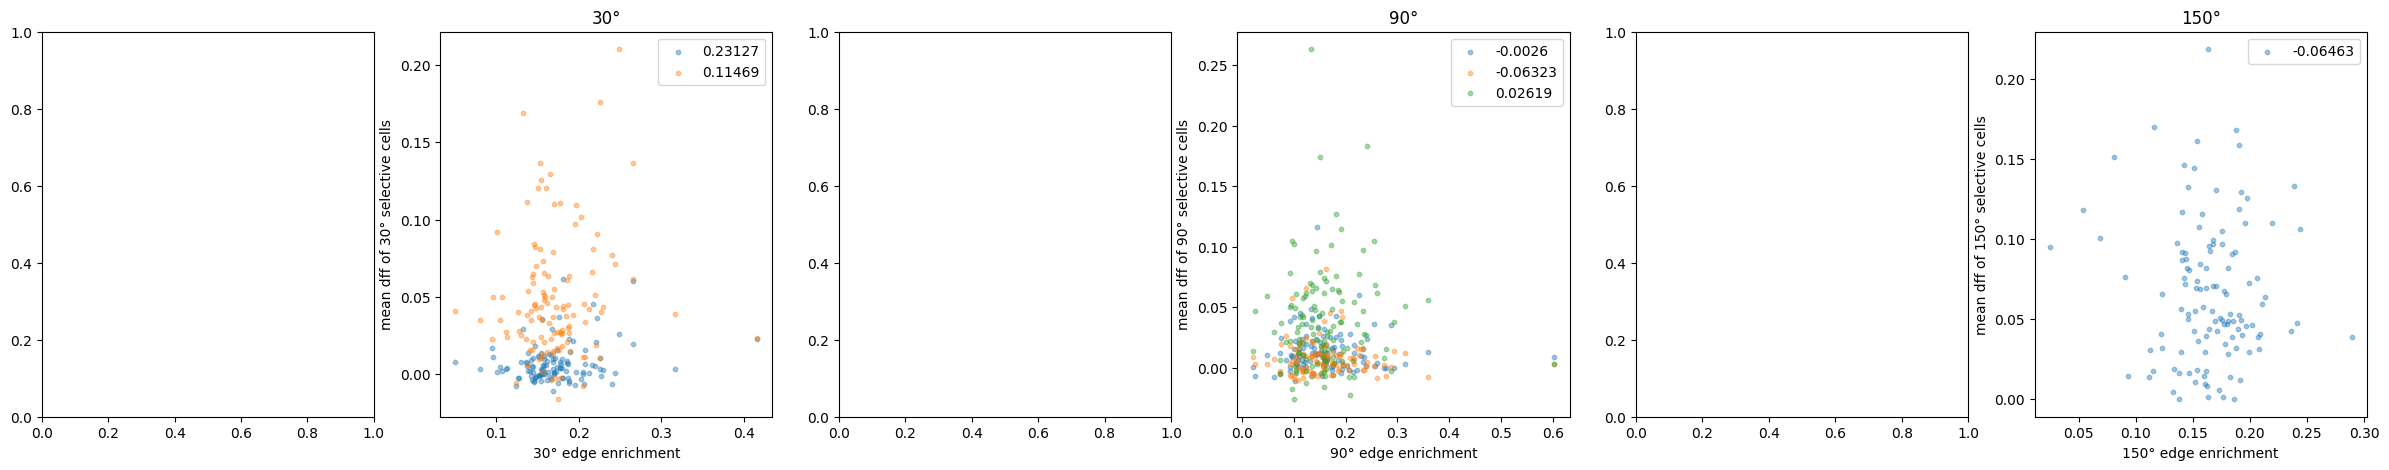

In [191]:
generate_fig(mean_df_dict_two_T)

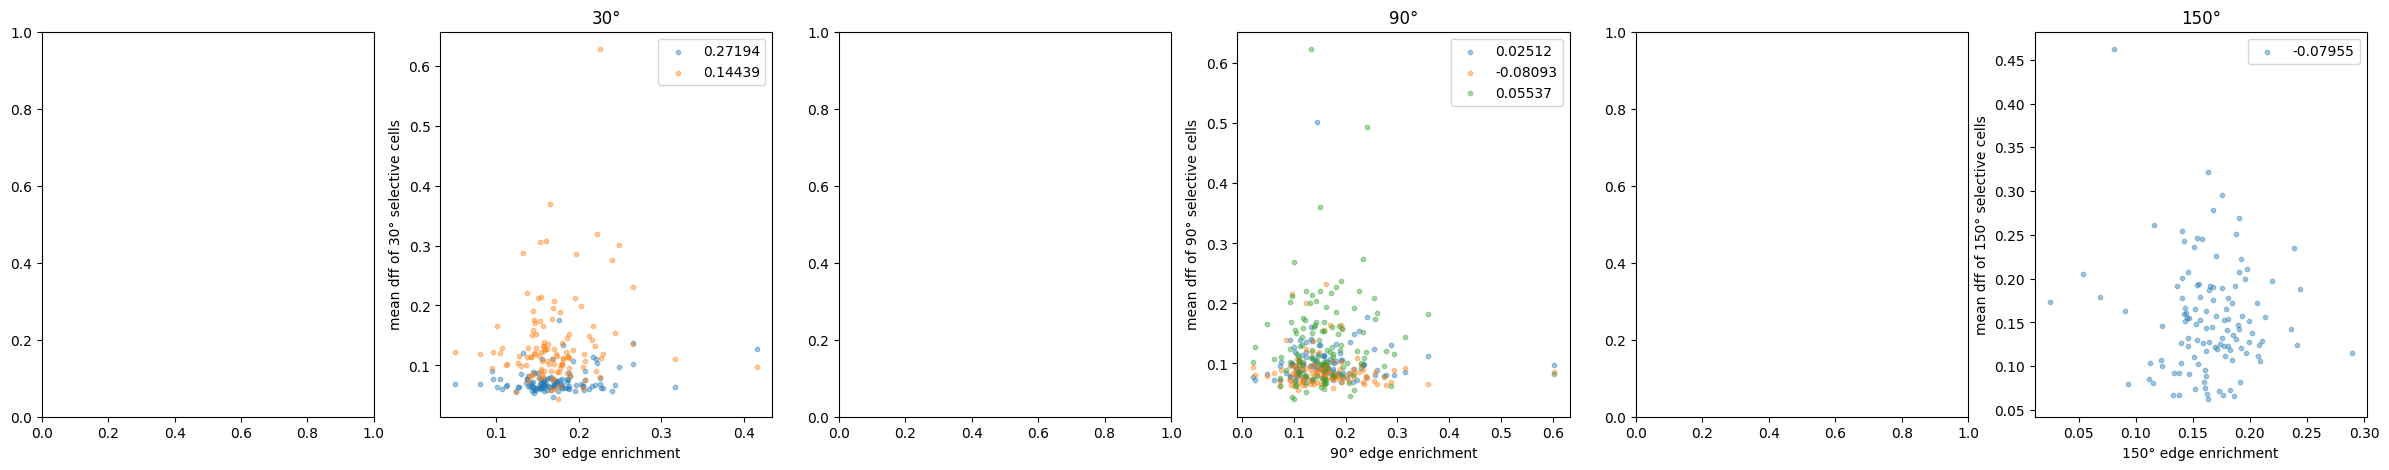

In [192]:
generate_fig(max_df_dict_two_T)